# Unsupervised machine learning (Unit 1 of 2 units)
`
By   : Dr. James G. Shanahan
EMAIL: James.Shanahan AT Gmail.com`

Unsupervised machine learning is the machine learning task of inferring a function to describe hidden structure from "unlabeled" data (a target value such as a classification or categorization is not included in the observations). Since the examples given to the learner are unlabeled, there is no evaluation of the accuracy of the structure that is output by the relevant algorithm—which is one way of distinguishing unsupervised learning from supervised learning and reinforcement learning.  The outcome of  unsupervised learning is a model be they  densities, centroids, eigenvectors, or projections  though unsupervised learning encompasses many other problems (and solutions) involving summarizing and explaining key features of the data.

There three main families of unsupervised learning algorithms:

* Clustering algorithms: focus on trying to locate homogenous groups of observations without any prior knowledge of those relationships,
* Common approaches here include:
  * k-means                         [Covered in this lecture]
  * mixture models                  [Covered in the optional material available with this course]
  * hierarchical clustering,        [Covered in this lecture]
* Dimensionality reduction techniques  via Latent variable models  
  * Unsupervised learning approaches such as principal components analysis (PCA), word2Vec are dimensionality reduction techniques where data points are remapped/projected into a lower dimensional space while, as much as possible, maintaining the distributional integrity of the data (e.g., such a quality might be data that were close in the original space are still relatively close in the reduced, projected space).
  * Expectation–maximization algorithm (EM)  [Covered in the optional material available with this course]
  * Method of moments
  * Blind signal separation techniques, e.g.,
    * Principal component analysis                [Covered lightly in this course]
    * Independent component analysis
    * Non-negative matrix factorization
    * Singular value decomposition
* Neural Networks:Unsupervised learning approaches based on neural networks and deep learning can be view as perceptual layers that allow us to summarize realworld signals such as images, speech, or the spoken/written word. We mention neural networks here for completeness but, due to time limitations, we will not cover this area in this course. 
  * Word2Vec
  * Autoencoders
  * Deep Belief Nets
  * Hebbian Learning
  * Generative Adversarial Networks
  * Self-organizing maps
 

## In this lab
In this lab, we will focus on two particular types of unsupervised learning: 

* clustering, a broad class of methods for discovering unknown subgroups in data and 
* principal components analysis, dimensionality reduction technique that can enable data visualization or data pre-processing before supervised techniques are applied 






Chapter 10 of the ISLR Book (["Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani](http://www-bcf.usc.edu/~gareth/ISL/)) provides an excellent introduction  to 
* Clustering
  * Kmeans
  * Hierarchichal clustering  
* Dimensionality Reduction
  * Principal Components Analysis (PCA) [Not covered in the lecture but presented here for completeness].

The next unit will introduction model based clustering approaches that use the EM (expectation maximization) algorithm.

## Lab goals
* Review Clustering in detail
  * Kmeans
  * Hierarchichal clustering 
  * be able to plot a dendogram
  * be able to visualize the results of Kmeans iterations
  * understand dissimilarity and distance
* Take a short tour of Dimensionality Reduction via PCA
  * What is PCA?
  * primary use cases



Note: for a more theoretical exposure of PCA and its connection to singular valued decomposition (SVD), please see [WikiPedia]( https://en.wikipedia.org/wiki/Principal_component_analysis)


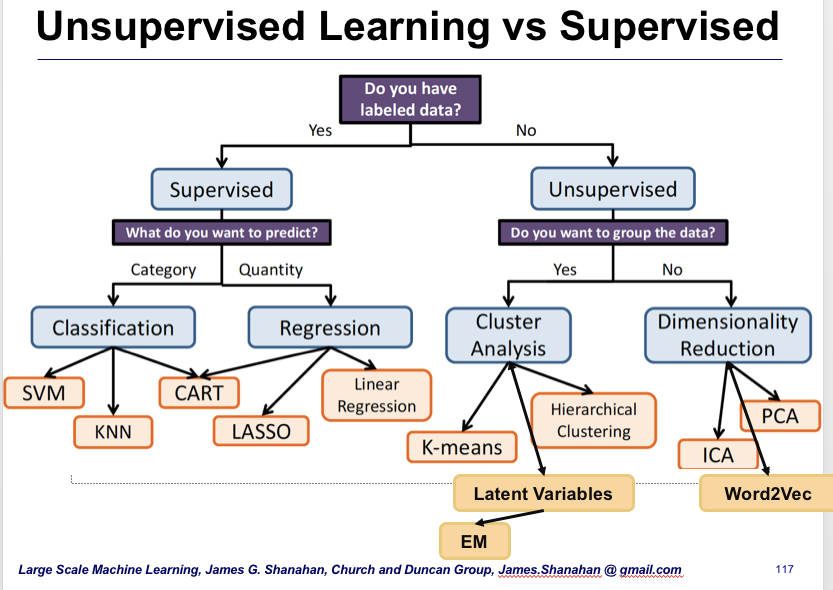

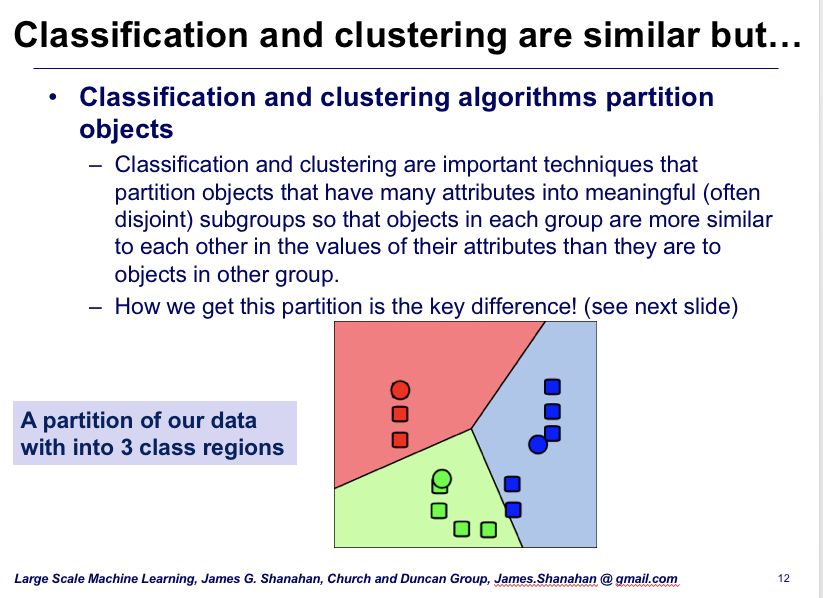


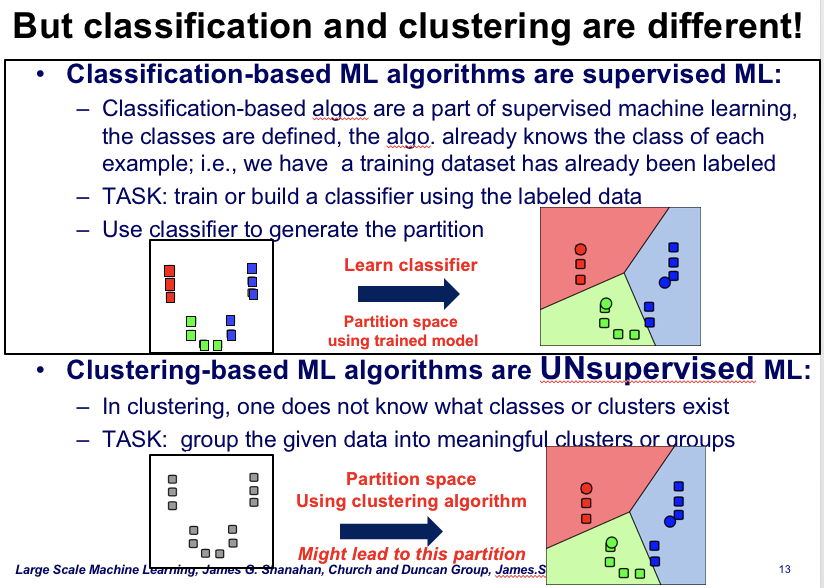

## In summary clustering is...
The goal of clustering is to find a natural partition of the data so that items in the same cluster are more similar to each other than to those from different clusters.


# A 2D visual example of  KMeans via SKLearn

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Step 1:** Generate some data so we can have a self-contained example.

In [3]:
#plt.figure(figsize=(12, 12))
n_samples = 1500
random_state = 170
make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, 
           center_box=(-10.0, 10.0), shuffle=True, random_state=None)
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
    

**Step 2:** Cluster the data using KMeans.

In [4]:
model = KMeans(n_clusters=3)
model.fit(X)
y_pred = model.predict(X)
# do it all in one line but then loose access to the model
#y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

## Do some analysis of clustering results

In [5]:
# Sum of distances of samples to their closest cluster center.
print("Sum of distances of samples to their closest cluster center is", round(model.inertia_,2))

# Distribution of data across clusters
print("\nDistribution of data across clusters")
print(pd.Series(model.labels_).value_counts().sort_index())
print("\ncluster_centers_ are:")
print(model.cluster_centers_)

Sum of distances of samples to their closest cluster center is 2862.73

Distribution of data across clusters
0    500
1    500
2    500
dtype: int64

cluster_centers_ are:
[[-8.94137566 -5.48137132]
 [-4.55490993  0.02920864]
 [ 1.91176144  0.40634045]]


## plt.scatter(xs, ys, c=y_pred)

**Step 3:** Assign column `0` of `points` to `xs`, and column `1` of `points` to `ys`

In [6]:
xs = X[:,0]
ys = X[:,1]

**Step 4:** Make a scatter plot of `xs` and `ys`, specifying the `c=y_pred` keyword arguments to color the points by their cluster label.  You'll see that KMeans has done a good job of identifying the clusters!

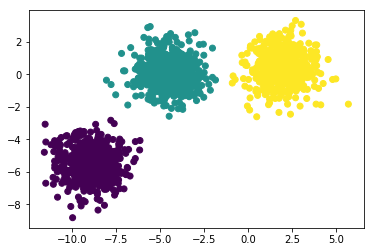

In [7]:
plt.scatter(xs, ys, c=y_pred, cmap='viridis')
plt.show()

**This is great**, but let's go one step further, and add the cluster centres (the "centroids") to the scatter plot.

## Plot the centroids

**Step 5:** Obtain the coordinates of the centroids using the `.cluster_centers_` attribute of `model`.  Assign them to `centroids`.

In [9]:
centroids = model.cluster_centers_
# Assign column `0` of `centroids` to `centroids_x`, and column `1` of `centroids` to `centroids_y`.
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

**Step 6:** In a single cell, create two scatter plots (this will show the two on top of one another).  Call `plt.show()` just once, at the end.

Firstly, the make the scatter plot you made above.  Secondly, make a scatter plot of `centroids_x` and `centroids_y`, using `'X'` (a cross) as a marker by specifying the `marker` parameter. Set the size of the markers to be `200` using `s=200`.

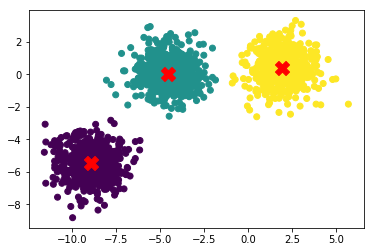

In [10]:
plt.scatter(xs, ys, c=y_pred)
plt.scatter(centroids_x, centroids_y, color='r', marker='X', s=200, cmap='viridis')
plt.show()

**Great work!** The centroids are important because they are what enables KMeans to assign new, previously unseen points to the existing clusters.

## Practice plotting some more

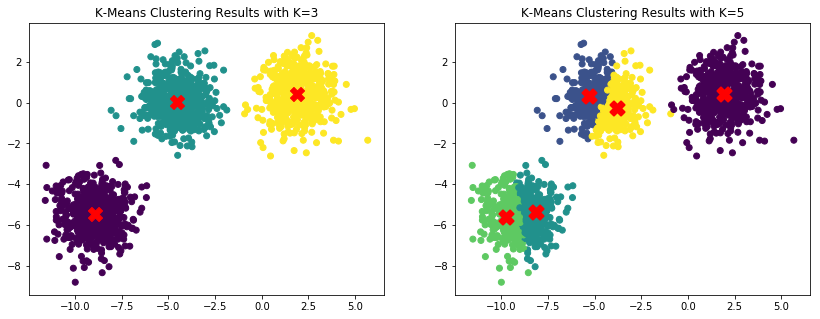

In [11]:
model = KMeans(n_clusters=5)
model.fit(X)
y_pred5 = model.predict(X)
centroids = model.cluster_centers_
centroids_x5 = centroids[:,0]
centroids_y5 = centroids[:,1]


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(xs, ys, c=y_pred)
ax1.scatter(centroids_x, centroids_y, c='r', marker='X', s=200, cmap='viridis')
ax1.set_title('K-Means Clustering Results with K=3')

ax2.scatter(xs, ys, c=y_pred5)
ax2.scatter(centroids_x5, centroids_y5, marker='X', s=200, c='r', linewidth=2, cmap='viridis')
ax2.set_title('K-Means Clustering Results with K=5');

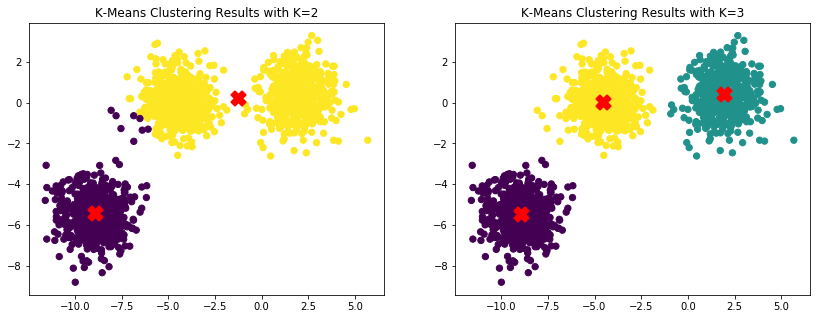

In [13]:
km2 = KMeans(n_clusters=2)
y_preds2 = km2.fit_predict(X)
km3 = KMeans(n_clusters=3)
y_preds3 = km3.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=y_preds2, cmap='viridis') 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], c='r', marker='X', s=200, linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=y_preds3, cmap='viridis') 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], c='r', marker='X', s=200, linewidth=2);

# Elbow method: determine optimal k  

Here we learn how to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).

We will is the SSE (sum of square errors) aka distortion as measure of cluster compactness. To get distortion function (sum of distance for each point to its center) when doing K means clustering by Scikit-Learn, one simple way is just to get the centers (`k_means.cluster_centers_`) and sum up the distance for each point. Or one can use the already pre-computed at fit time `inertia_ attribute` for the KMeans class. See below for example of this.

**Step 1:** Load the dataset.

In [14]:
def load_seeds():
    seeds_df = pd.read_csv('datasets/seeds.csv')

    # extract the grain varieties from the dataframe 
    varieties = list(seeds_df['grain_variety'])   # ground truth for evaluation purposes

    # remove grain variety (target) from the feature set
    del seeds_df['grain_variety']
    
    return seeds_df, varieties
    
seeds_df, varieties = load_seeds()

**Step 2:** EDA: Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [15]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


**Step 3:** Extract the measurements (input features) from the DataFrame using its `.values` attribute:

In [16]:
samples = seeds_df.values
samples[:5]

array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ]])

**Step 4:**  Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [17]:
ks = range(1, 7)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

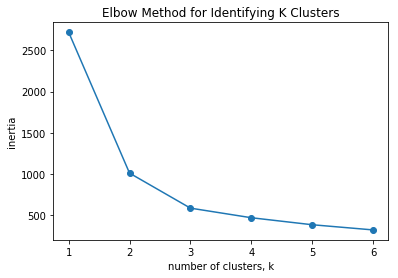

In [18]:
# Plot number of clusters (k) vs inertia for each model
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('Elbow Method for Identifying K Clusters')
plt.show()

**Excellent work!** You can see from the graph that 3 is a good number of clusters, since these are points where the inertia begins to decrease more slowly.

# Evaluate Kmeans using ground truth data

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data.  In fact, the grain samples come from a mix of 3 different grain varieties: 

* "Kama" 
* "Rosa"  
* "Canadian"  

In this section, we cluster the grain samples into three clusters, and compare the clusters to the grain varieties (ground truth) using a cross-tabulation.

Note, this happens to be a labeled dataset that we will use for clustering (normally we will not have the label column for an unsupervised tasks). We will leverage the label feature  here to assess the quality of clustering.


In [19]:
# refresh the dataset
samples, varieties = load_seeds()

__Step 1:__ Create model with 3 clusters and predict varieties.

In [20]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

**Step 2:** Create a DataFrame `df` with two columns named `'labels'` and `'varieties'`, using `labels` and `varieties`, respectively, for the column values. 


In [21]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

**Step 3:** Use the `pd.crosstab()` function on `df['labels']` and `df['varieties']` to count the number of times each grain variety coincides with each cluster label. Assign the result to `ct`.

In [22]:
ct = pd.crosstab(df['labels'], df['varieties'])

**Step 4:** Display `ct` by evaluating it - and inspect your cross-tabulation!  You'll see that your clustering is pretty good.

In [23]:
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,68,9,0
1,0,1,60
2,2,60,10


## Task:  Implement external evaluation metrics
Implement the following external evaluation metrics for the KMeans clustering algorithm and use to assess the quality of the clustering results in the previous section

* Rand Index 
* Purity


In [24]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score

# map known string labels to integer classes 
variety_labels = {'Kama wheat':0, 'Rosa wheat': 1, 'Canadian wheat': 2}
true_labels =  df['varieties'].map(variety_labels)

# note: function requires true value first, then predicted
hs = homogeneity_score(true_labels, labels)

print('Homogeneity score is:', round(hs,3))
print('Homegeneity (purity) is scaled from 0.0 to 1.0 - a perfect score has homogeneity of 1.0.')

Homogeneity score is: 0.693
Homegeneity (purity) is scaled from 0.0 to 1.0 - a perfect score has homogeneity of 1.0.


In [25]:
# use a similar approach to calculate the adjusted_rand_score




# A clustering pipeline: standardize data

We will work on array samples giving measurements of fish. This  dataset was derived from the one [here](http://svitsrv25.epfl.ch/R-doc/library/rrcov/html/fish.html), where you can see a description of each measurement. Each row represents a single fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. 

In this section, we'll build a pipeline to standardize and cluster the data and then evaluate the quality of clustering results:

* Build a standardization and clustering pipeline to cluster the fish by their measurements (input features)
* then create a cross-tabulation to compare the cluster labels with the ground truth `fish species`.

## Load Fish data and do EDA

**Step 1:** Load the dataset, extracting the target feature (label), the species of the fish as a list `species` 

Note, this happens to be another labeled dataset that we will use for clustering (normally we will not have the label column for an unsupervised tasks). We will leverage the label feature to assess the quality of clustering.


In [26]:
df = pd.read_csv('datasets/fish.csv')

# remove the species from the DataFrame so only the measurements are left
species = list(df['species'])
del df['species']

In [27]:
# inspect the dataset
df.head()

,weight,length1,length2,length3,height,width
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


## Build a clustering pipeline
**Step 2:** Build a pipeline!!

In [28]:
# Extract all the measurements as a 2D NumPy array, assigning to samples
samples = df.values

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)

## Fit the pipeline
**Step 3:** Fit the pipeline to the fish measurements `samples`.

In [29]:
pipeline.fit(samples)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

## Use clusters to assign labels to training data
**Step 4:** Obtain the cluster labels for `samples` by using the `.predict()` method of `pipeline`, assigning the result to `labels`.

In [30]:
labels = pipeline.predict(samples)

## Evaluate clustering algo 
**Step 5:** Using `pd.DataFrame()`, create a DataFrame `df` with two columns named `'labels'` and `'species'`, using `labels` and `species`, respectively, for the column values.

In [31]:
df = pd.DataFrame({'labels': labels, 'species': species})

**Step 6:** Using `pd.crosstab()`, create a cross-tabulation `ct` of `df['labels']` and `df['species']`.

In [32]:
ct = pd.crosstab(df['labels'], df['species'])

**Step 7:** Display the cross-tabulation, and check out how good the clustering is!

In [33]:
ct

species,Bream,Pike,Roach,Smelt
labels,,,,
0,0,0,0,13
1,33,0,1,0
2,0,17,0,0
3,1,0,19,1


## Task:  Evaluate using external evaluation metrics
Using the  clustering  external evaluation metrics implemented above,  assess the quality of the clustering results in the previous section, i.e., compute the following metrics:

* Rand Index 
* Purity

# A normalization pipeline for stock data


In this section, we'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). E.g., one intuition here is that tech stocks might move in similar ways as such can be groups based on the data, where as blue chip stocks may move in a different way and form another group or multiple groups.

**The stock data consists of 60 stocks tracked over 963 trading days.**

Given given a NumPy array movements of daily price movements from 2010 to 2015, where each row corresponds to a company, and each column corresponds to a trading day. 

Some stocks are more expensive than others. To account for this, we include a Normalizer at the beginning of the pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

### Normalizer vs StandardScaler
Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance. Normalizer() rescales each sample (or row) - here, each company's stock price differences - independently of the other (a row centric operation). 

Normalize samples individually to unit norm.
Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1 or l2) equals one.



This dataset was obtained from the Yahoo! Finance API.

## Step 1:  Load the data  and do some EDA

In [34]:
fn = 'datasets/company-stock-movements-2010-2015-incl.csv'
stocks_df = pd.read_csv(fn, index_col=0)

In [35]:
print('DataFrame shape:',stocks_df.shape)
stocks_df.head()

DataFrame shape: (60, 963)


,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [36]:
# Extract the NumPy array `movements` from the DataFrame and the list of company names
companies = list(stocks_df.index)
movements = stocks_df.values

### CrossCheck normalization

Normalize samples individually to unit norm.
Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1 or l2) equals one.



In [37]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
print(normalizer.fit(stocks_df))

row1Normalized = normalizer.transform(stocks_df)[0,:]
print("The first row is normalized such that L2 norm of the row is ", np.round(row1Normalized.dot(row1Normalized),2))

row1Normalized = normalizer.transform(stocks_df)[:5,:]
row1Normalized.dot(np.transpose(row1Normalized))

Normalizer(copy=True, norm='l2')
The first row is normalized such that L2 norm of the row is  1.0


array([[1.        , 0.22282161, 0.31801376, 0.28172331, 0.27655911],
       [0.22282161, 1.        , 0.25421303, 0.37044296, 0.32668227],
       [0.31801376, 0.25421303, 1.        , 0.38525941, 0.3160831 ],
       [0.28172331, 0.37044296, 0.38525941, 1.        , 0.48884131],
       [0.27655911, 0.32668227, 0.3160831 , 0.48884131, 1.        ]])

## Step 2 Build a clustering pipeline
**Step 2:** Using `make_pipeline()`, create a pipeline called `pipeline` that chains `normalizer` and `kmeans`.

In [38]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
normalizer = Normalizer()
kmeans = KMeans(n_clusters=14)
pipeline = make_pipeline(normalizer, kmeans)

## Step 3: fit the pipeline to the stock movements data
**Step 3:** Fit the pipeline to the stock `movements` array.

In [39]:
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

## Explore results: which stocks cluster together
So which company have stock prices that tend to change in the same way? Now inspect the cluster labels from your clustering to find out.

In [40]:

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import pandas as pd

fn = 'datasets/company-stock-movements-2010-2015-incl.csv'
stocks_df = pd.read_csv(fn, index_col=0)

companies = list(stocks_df.index)
movements = stocks_df.values

#run the clustering pipeline
normalizer = Normalizer()
kmeans = KMeans(n_clusters=14)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(movements)

#Use the .predict() method of the pipeline to predict the labels for movements.
y_pred = pipeline.predict(movements)

Align the cluster labels with the list of company names companies by creating a DataFrame df with labels and companies as columns.

In [41]:
df = pd.DataFrame({'labels': y_pred, 'companies': companies})

Now display the DataFrame, sorted by cluster label. To do this, use the .sort_values() method of df to sort the DataFrame by the 'labels' column.

In [42]:
df.sort_values('labels')

,companies,labels
8,Caterpillar,0
13,DuPont de Nemours,0
12,Chevron,0
32,3M,0
10,ConocoPhillips,0
23,IBM,0
39,Pfizer,0
20,Home Depot,0
53,Valero Energy,0
57,Exxon,0


 Using k-means, we get to  discover which companies stock prices move together on the stock exchange. Some groupings are highly intuitive while others would require additional clustering or analysis.

# Hierarchical Clustering

In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

* Agglomerative: This is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
* Divisive: This is a "top down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

In the standard algorithm for hierarchical agglomerative clustering (HAC) has a time complexity of ${\displaystyle {\mathcal {O}}(n^{3})} $ and requires ${\displaystyle {\mathcal {O}}(n^{2})} $ memory, which makes it too slow for even medium data sets. 

## Understanding a Dendogram: A simple 2D Example

In the following example the examples `[-1, -2]` and `[-2, -1]` are a Euclidean distance of 1.41 apart. This is shown on the dendogram plot on the right. The Hieriachical Agglomerative Clustering (HAC) algorithm used here is based on ** Single Linkage** which calculates distances (dissimilarity) as follows:

$$D_{singleLinkage}(C1,C2)=\min _{{x\in C1,y\in C2}}d(x,y),$$

As such the second cluster is formed  between cluster `[[-1, -2], [-2, -1]]` and `[1, -3]`. The  Single Linkage distance between these clusters is 2.24 which is calculated as follows:

$$D_{singleLinkage}([-1, -2], [1, -3]) = \sqrt{(4+1)}=2.24$$

This distance is plotted also on the Dendogram on the right.


### A small dendogram with 5 examples

In [43]:
X = np.array([[1, -3],
             [-1, -2],
             [-2, -1],
             [1, 1],
              [1, 4]])

dissimilarityMatrix =[]
for i in range(X.shape[0]):
    row = []
    for j in range(X.shape[0]):
        row.append (np.linalg.norm(X[i,:] - X[j,:]))
    dissimilarityMatrix.append(row)
#Dissimilarity matrix based on euclidean distance    
pd.DataFrame(dissimilarityMatrix)

NameError: name 'similarityMatrix' is not defined

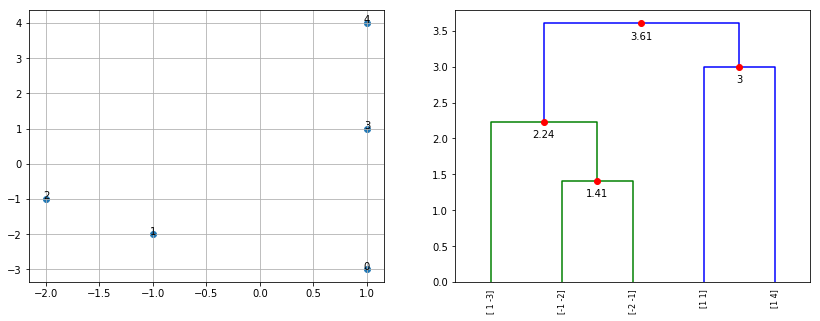

In [44]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
np.random.seed(2)

def augmented_dendrogram(*args, **kwargs):

    ddata = hierarchy.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')

    return ddata


X = np.array([[1, -3],
             [-1, -2],
             [-2, -1],
             [1, 1],
              [1, 4],
             ])


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:, 0], X[:, 1])

for i in range(X.shape[0]):
    ax1.annotate(i, (X[i, 0], X[i, 1]), ha='center')
ax1.grid()
Z = hierarchy.linkage(X, 'single')  #CLUSTER the data using hierarchical method
dn = augmented_dendrogram(Z, labels=X, 
                         leaf_rotation=90.,  # rotates the x axis labels
                        leaf_font_size=8.,  # font size for the x axis labels
)

## A bigger Dendogram Example

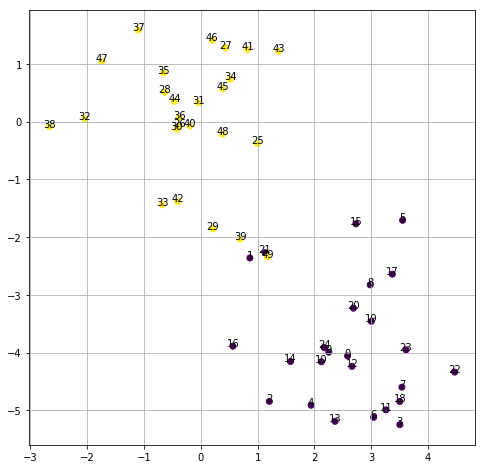

In [45]:
# Generate data
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=np.concatenate([np.zeros(25), np.ones(25)]))
# Annotate data with indexes
for i in range(50):
    plt.annotate(i, (X[i, 0], X[i, 1]), ha='center')
plt.grid()
plt.show()

## Hierarchical clusters via Complete/Average/Ward Linkage

Using:

* `sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’ward’, pooling_func=<function mean>)`

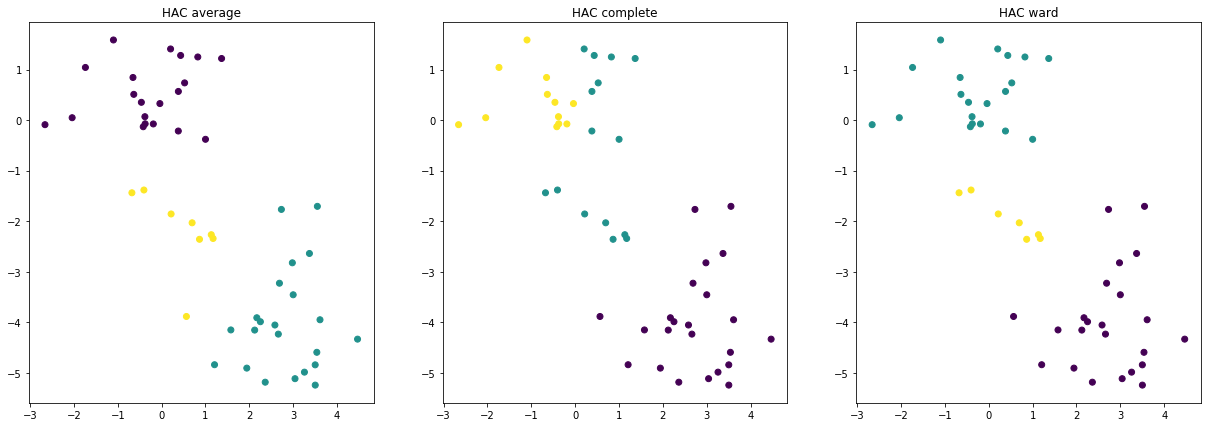

In [46]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
fig, plots = plt.subplots(1,3, figsize=(21, 7))
hierComp = AgglomerativeClustering(X)
titles= ('HAC average', 'HAC complete', 'HAC ward')
for (p, t, linkage) in zip(plots, titles, ('average', 'complete', 'ward')):
    model = AgglomerativeClustering(linkage=linkage, n_clusters= 3)
    model.fit(X)
    p.scatter(X[:, 0], X[:, 1], c=model.labels_)
    p.set_title(t)
    #print(model.labels_)
    

 

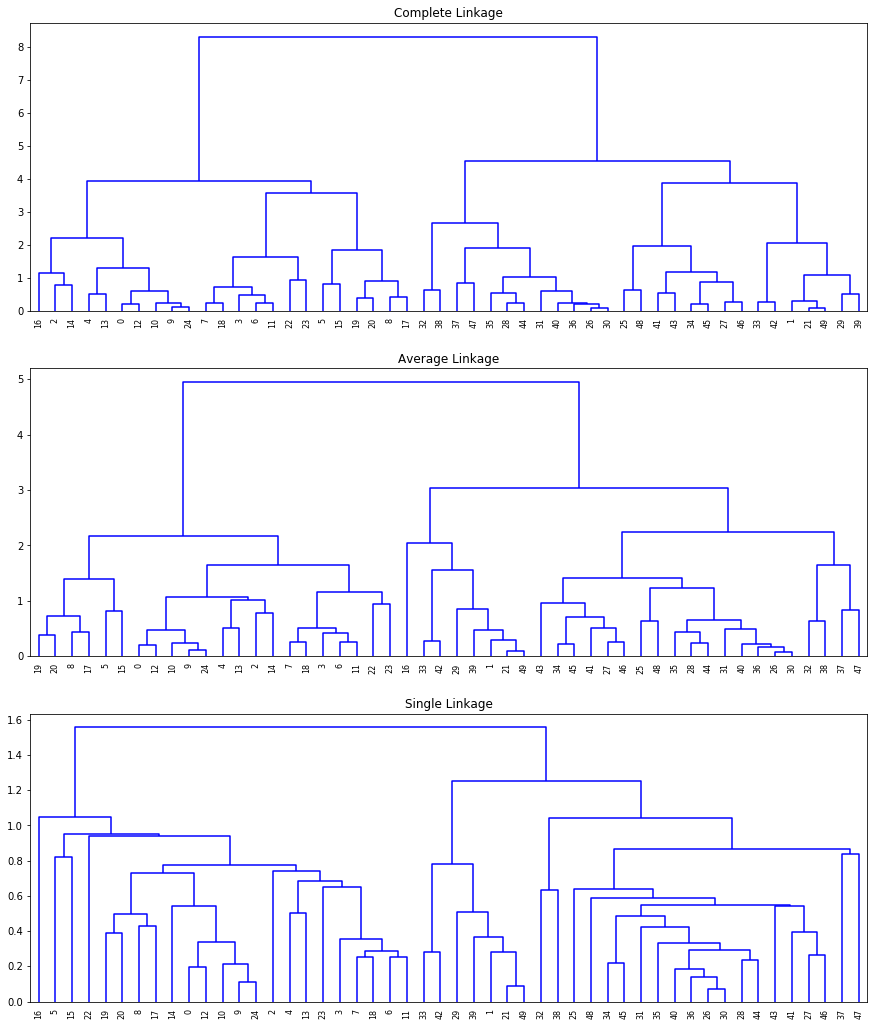

In [47]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

# Principal Components Analysis

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. If there are ${\displaystyle n}$  observations with ${\displaystyle p} $ variables, then the number of distinct principal components is ${\displaystyle \min(n-1,p)}$. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

Chapter 10 of the ISLR Book (["Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani](http://www-bcf.usc.edu/~gareth/ISL/)) provides an excellent introduction  of Principal Components Analysis (PCA). For a more theoretical exposure of PCA and its connection to singular valued decomposition (SVD), please see [WikiPedia]( https://en.wikipedia.org/wiki/Principal_component_analysis)

This lab on Principal Components Analysis is a python adaptation of p. 401-404,
408-410 of "Introduction to Statistical Learning with Applications in R" by Gareth James,
Daniela Witten, Trevor Hastie and Robert Tibshirani. Original adaptation by J. Warmenhoven, updated by R. Jordan Crouser at Smith College for
SDS293: Machine Learning (Spring 2016).

## The Rotation Matrix

In PCA, we focus on learning a new basis where our data will live (usually of lower dimensionality). Our data can be projected into thus new universe using a projection matrix.  Think of this projection matrix as a _rotation matrix_. PCA allows to learn this rotation matrix from our training data.

In linear algebra, a rotation matrix is a matrix that is used to perform a rotation in Euclidean space. For example, using the convention below, the matrix

$${\displaystyle R={\begin{bmatrix}\cos \theta &-\sin \theta \\\sin \theta &\cos \theta \\\end{bmatrix}}} $$
rotates points in the xy-plane counterclockwise through an angle $θ$ about the origin of the Cartesian coordinate system. To perform the rotation using a rotation matrix $R$, the position of each point must be represented by a column vector v, containing the coordinates of the point. A rotated vector is obtained by using the matrix multiplication $Rv$.

For more details, see the following images or  [this video](https://www.youtube.com/watch?v=h11ljFJeaLo).
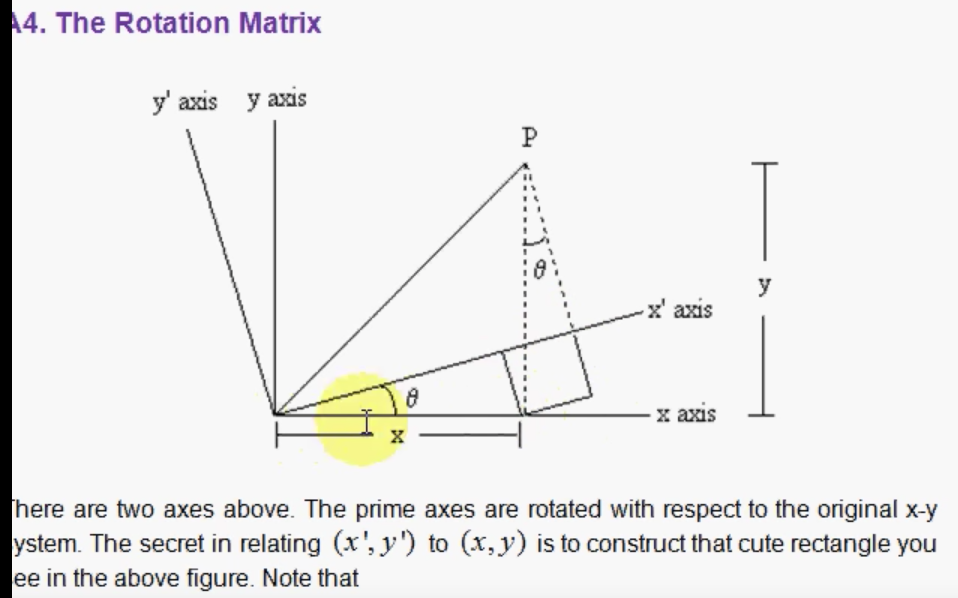

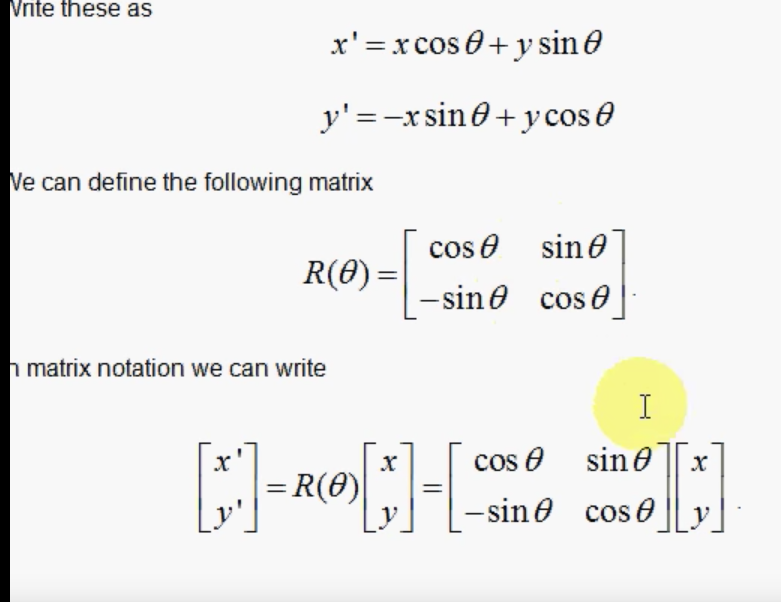

## PCA Labs
The follow examples are based on labs from the ISLR Book: "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Original adaptation by J. Warmenhoven, updated by R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016).

## 10.4: Principal Components Analysis

In this section, we perform PCA on the ${\tt USArrests}$ data set. The rows of the data set contain the 50 states, in
alphabetical order:

In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
%%writefile datasets/USArrests.csv
"","Murder","Assault","UrbanPop","Rape"
"Alabama",13.2,236,58,21.2
"Alaska",10,263,48,44.5
"Arizona",8.1,294,80,31
"Arkansas",8.8,190,50,19.5
"California",9,276,91,40.6
"Colorado",7.9,204,78,38.7
"Connecticut",3.3,110,77,11.1
"Delaware",5.9,238,72,15.8
"Florida",15.4,335,80,31.9
"Georgia",17.4,211,60,25.8
"Hawaii",5.3,46,83,20.2
"Idaho",2.6,120,54,14.2
"Illinois",10.4,249,83,24
"Indiana",7.2,113,65,21
"Iowa",2.2,56,57,11.3
"Kansas",6,115,66,18
"Kentucky",9.7,109,52,16.3
"Louisiana",15.4,249,66,22.2
"Maine",2.1,83,51,7.8
"Maryland",11.3,300,67,27.8
"Massachusetts",4.4,149,85,16.3
"Michigan",12.1,255,74,35.1
"Minnesota",2.7,72,66,14.9
"Mississippi",16.1,259,44,17.1
"Missouri",9,178,70,28.2
"Montana",6,109,53,16.4
"Nebraska",4.3,102,62,16.5
"Nevada",12.2,252,81,46
"New Hampshire",2.1,57,56,9.5
"New Jersey",7.4,159,89,18.8
"New Mexico",11.4,285,70,32.1
"New York",11.1,254,86,26.1
"North Carolina",13,337,45,16.1
"North Dakota",0.8,45,44,7.3
"Ohio",7.3,120,75,21.4
"Oklahoma",6.6,151,68,20
"Oregon",4.9,159,67,29.3
"Pennsylvania",6.3,106,72,14.9
"Rhode Island",3.4,174,87,8.3
"South Carolina",14.4,279,48,22.5
"South Dakota",3.8,86,45,12.8
"Tennessee",13.2,188,59,26.9
"Texas",12.7,201,80,25.5
"Utah",3.2,120,80,22.9
"Vermont",2.2,48,32,11.2
"Virginia",8.5,156,63,20.7
"Washington",4,145,73,26.2
"West Virginia",5.7,81,39,9.3
"Wisconsin",2.6,53,66,10.8
"Wyoming",6.8,161,60,15.6

Overwriting datasets/USArrests.csv


In [50]:
df = pd.read_csv('datasets/USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


The columns of the data set contain four variables relating to various crimes:

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Let's start by taking a quick look at the column means of the data:

In [52]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

We see right away the the data have **vastly** different means. We can also examine the variances of the four variables:

In [53]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Not surprisingly, the variables also have vastly different variances: the
${\tt UrbanPop}$ variable measures the percentage of the population in each state
living in an urban area, which is not a comparable number to the number
of crimes committeed in each state per 100,000 individuals. If we failed to scale the
variables before performing PCA, then most of the principal components
that we observed would be driven by the ${\tt Assault}$ variable, since it has by
far the largest mean and variance. 

Thus, it is important to standardize the
variables to have mean zero and standard deviation 1 before performing
PCA. We can do this using the ${\tt scale()}$ function from ${\tt sklearn}$:

In [54]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

Now we'll use the ${\tt PCA()}$ function from ${\tt sklearn}$ to compute the loading vectors:

In [55]:
pca = PCA(pca.fit(X))


NameError: name 'PCA' is not defined

In [56]:
from sklearn.decomposition import PCA

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


We see that there are four distinct principal components. This is to be
expected because there are in general ${\tt min(n − 1, p)}$ informative principal
components in a data set with $n$ observations and $p$ variables.

Using the ${\tt fit_transform()}$ function, we can get the principal component scores of the original data. We'll take a look at the first few states:

In [57]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


We can construct a **biplot** of the first two principal components using our loading vectors:

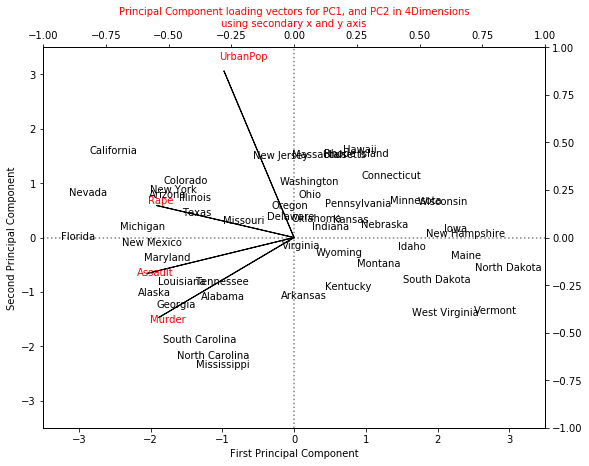

In [58]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
#plot the loadings of the first PC and second PC (2 by 4 matrix)
ax2.set_xlabel('Principal Component loading vectors for PC1, and PC2 in 4Dimensions\nusing secondary x and y axis', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

The ${\tt PCA()}$ function also outputs the variance explained by of each principal
component. We can access these values as follows:

In [59]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

We can also get the proportion of variance explained:

In [60]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

We see that the first principal component explains 62.0% of the variance
in the data, the next principal component explains 24.7% of the variance,
and so forth. We can plot the PVE explained by each component as follows:

([<matplotlib.axis.XTick at 0x1a17cd4518>,
 <a list of 4 Text xticklabel objects>)

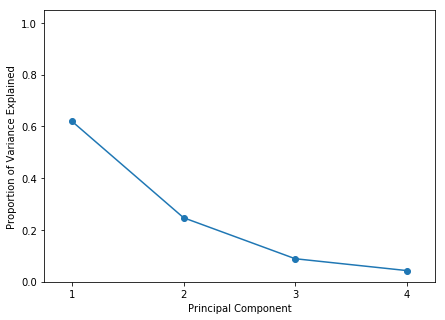

In [61]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

We can also use the function ${\tt cumsum()}$, which computes the cumulative sum of the elements of a numeric vector, to plot the cumulative PVE:

([<matplotlib.axis.XTick at 0x1a18530f98>,
 <a list of 4 Text xticklabel objects>)

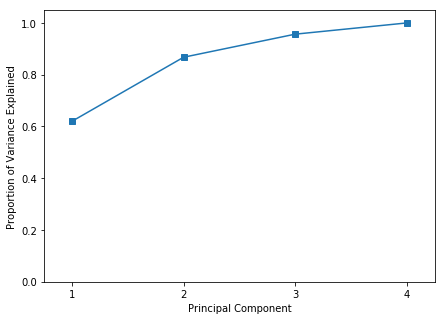

In [62]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])



## 10.6: NCI60 Cancer Data Example

Let's return to the ${\tt NCI60}$ cancer cell line microarray data, which
consists of 6,830 gene expression measurements on 64 cancer cell lines:

In [63]:
df2 = pd.read_csv('datasets/NCI60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [64]:
# Read in the labels to check our work later
y = pd.read_csv('datasets/NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])

## 10.6.1 PCA on the NCI60 Data

We first perform PCA on the data after scaling the variables (genes) to
have standard deviation one, although one could reasonably argue that it
is better not to scale the genes:

In [65]:
# Scale the data
X = pd.DataFrame(scale(df2))
X.shape

# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

We now plot the first few principal component score vectors, in order to
visualize the data. The observations (cell lines) corresponding to a given
cancer type will be plotted in the same color, so that we can see to what
extent the observations within a cancer type are similar to each other:

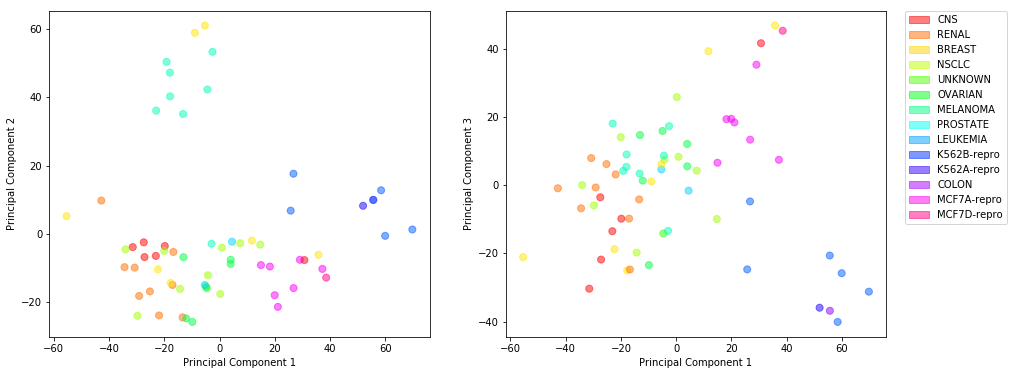

In [66]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv

# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1') 

On the whole, cell lines corresponding to a single cancer type do tend to have similar values on the
first few principal component score vectors. This indicates that cell lines
from the same cancer type tend to have pretty similar gene expression
levels.

We can generate a summary of the proportion of variance explained (PVE)
of the first few principal components:

In [69]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).values,
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Using the ${\tt plot()}$ function, we can also plot the variance explained by the
first few principal components:

Text(0,0.5,'Variances')

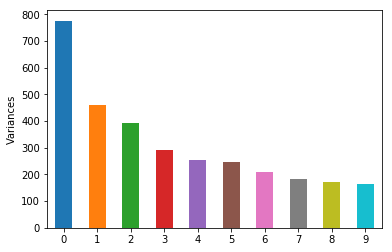

In [70]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

However, it is generally more informative to
plot the PVE of each principal component (i.e. a **scree plot**) and the cumulative
PVE of each principal component. This can be done with just a
little tweaking:

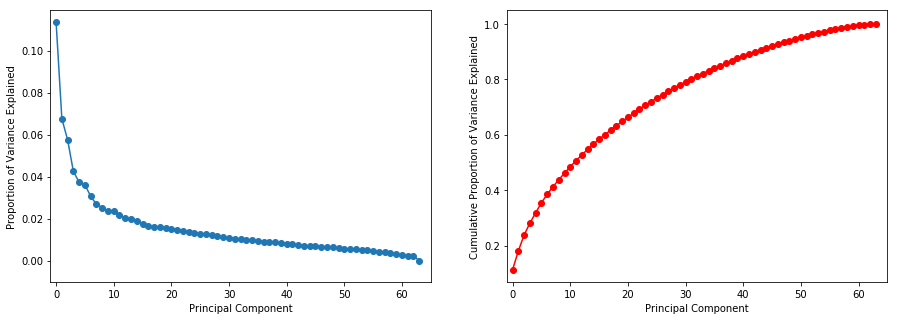

In [71]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)    

We see that together, the first seven principal components
explain around 40% of the variance in the data. This is not a huge amount
of the variance. However, looking at the scree plot, we see that while each
of the first seven principal components explain a substantial amount of
variance, there is a marked decrease in the variance explained by further
principal components. That is, there is an **elbow** in the plot after approximately
the seventh principal component. This suggests that there may
be little benefit to examining more than seven or so principal components
(phew! even examining seven principal components may be difficult).

# References

Some of the material in this has been adopted from  the following:
* Chapter 10 of the ISLR Book (["Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani](http://www-bcf.usc.edu/~gareth/ISL/))
* [Wikipedia's entry on KMeans](https://en.wikipedia.org/wiki/K-means_clustering)
* [benjamin wilson's github on kmeans]( https://github.com/benjaminwilson/python-clustering-exercises)